<a href="https://colab.research.google.com/github/DonRoboto/OpenCV/blob/master/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#cargar librerias
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import optimizers, backend
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

In [0]:
#separar datos de entrenamiento y test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [31]:
#mostrar cuanto hay de entrenamiento y test
print("x_train=", x_train.shape[0])
print("y_train=", y_train.shape[0])
print("x_test=", x_test.shape[0])
print("y_test=", y_test.shape[0])

x_train= 50000
y_train= 50000
x_test= 10000
y_test= 10000


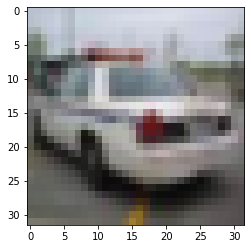

la imagen 24678 corresponde con la etiqueta [1]


In [32]:
#mostrar una imagen y etiqueta
n_imagen = 24678
etiqueta = y_train[n_imagen]
plt.imshow(x_train[n_imagen], cmap='gray')
plt.show()
print("la imagen {} corresponde con la etiqueta {}".format(n_imagen, etiqueta))

In [0]:
#normalizar valores
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

In [34]:
#convertir clases a one hot encoding
y_train1 = np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test)

print(y_train[100], "->", y_train1[100])

[8] -> [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [0]:
#arquitectura del modelo 
modeloConv = Sequential()
modeloConv.add(Conv2D(32, kernel_size=(3,3), activation='relu', use_bias=True, input_shape=(32,32,3)))
modeloConv.add(Conv2D(64, kernel_size=(3,3), activation='relu', use_bias=True))
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Conv2D(128, kernel_size=(3,3), activation='relu', use_bias=True))
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Conv2D(128, kernel_size=(3,3), activation='relu', use_bias=True))
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Flatten())
modeloConv.add(Dense(1024, activation='relu', use_bias=True))
modeloConv.add(Dense(10, activation='softmax'))

In [36]:
#resumen del modelo
modeloConv.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 128)        

In [0]:
#optimizador y compilacion del modelo
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)
modeloConv.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#salvar el modelo
checkpointer = ModelCheckpoint('modelo_v1.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1 )

In [42]:
#entrenamiento
M = modeloConv.fit(x_train, y_train1, validation_data=(x_test, y_test1), epochs=3, batch_size=32, shuffle=True, callbacks=[checkpointer], verbose=1 )

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 279s 6ms/step - loss: 2.3242 - accuracy: 0.0996 - val_loss: 2.3035 - val_accuracy: 0.1000

Epoch 00001: val_accuracy improved from -inf to 0.10000, saving model to modelo_v1.h5
Epoch 2/3
50000/50000 [==============================] - 275s 6ms/step - loss: 2.3038 - accuracy: 0.1010 - val_loss: 2.3042 - val_accuracy: 0.1000

Epoch 00002: val_accuracy did not improve from 0.10000
Epoch 3/3
50000/50000 [==============================] - 280s 6ms/step - loss: 2.3042 - accuracy: 0.0994 - val_loss: 2.3029 - val_accuracy: 0.1000

Epoch 00003: val_accuracy did not improve from 0.10000


In [0]:
#leer los pesos guardados sin tener que entrenar nuevamente
#modeloConv.load_weights('modelo_v1.h5')

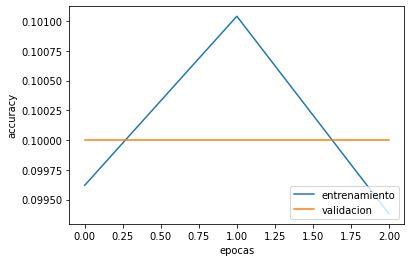

In [43]:
#graficar metricas
plt.plot(M.history['accuracy'], label='entrenamiento')
plt.plot(M.history['val_accuracy'], label='validacion')
plt.legend(loc='lower right')
plt.xlabel('epocas')
plt.ylabel('accuracy')
plt.show()

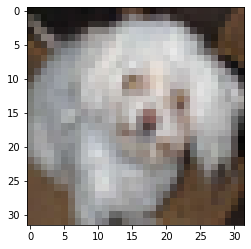

la imagen 1000 tiene la etiqueta [5] y el modelo la clasifica como [5]


In [45]:
#probar una clasificacion
n_imagen = 1000
imagen = x_test[n_imagen]
etiqueta = y_test[n_imagen]
prediccion = modeloConv.predict_classes(imagen.reshape(1, 32,32,3))

plt.imshow(imagen)
plt.show()
print("la imagen {} tiene la etiqueta {} y el modelo la clasifica como {}".format(n_imagen, etiqueta, prediccion))

In [47]:
#evaluacion general del modelo
evaluacion = modeloConv.evaluate(x_test, y_test1)
error = evaluacion[0]
accuracy = evaluacion[1]
print("error final del modelo {}".format(error))
print("accuracy final del modelo {}".format(accuracy))

10000/10000 [==============================] - 13s 1ms/step
error final del modelo 2.3029304206848145
accuracy final del modelo 0.10000000149011612
